Saving H1N1 CASES.csv to H1N1 CASES (4).csv
Epoch 1/50
9/9 [==============================] - 1s 23ms/step - loss: 0.0073 - val_loss: 5.3207e-04
Epoch 2/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0043 - val_loss: 2.0257e-05
Epoch 3/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 3.1521e-06
Epoch 4/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0029 - val_loss: 8.0312e-05
Epoch 5/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0029 - val_loss: 3.4784e-06
Epoch 6/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 2.0416e-05
Epoch 7/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0022 - val_loss: 8.7294e-07
Epoch 8/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0025 - val_loss: 2.1651e-05
Epoch 9/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 5.3081e-07
Epoch 10/50
9/9 [==============================] - 0s 6

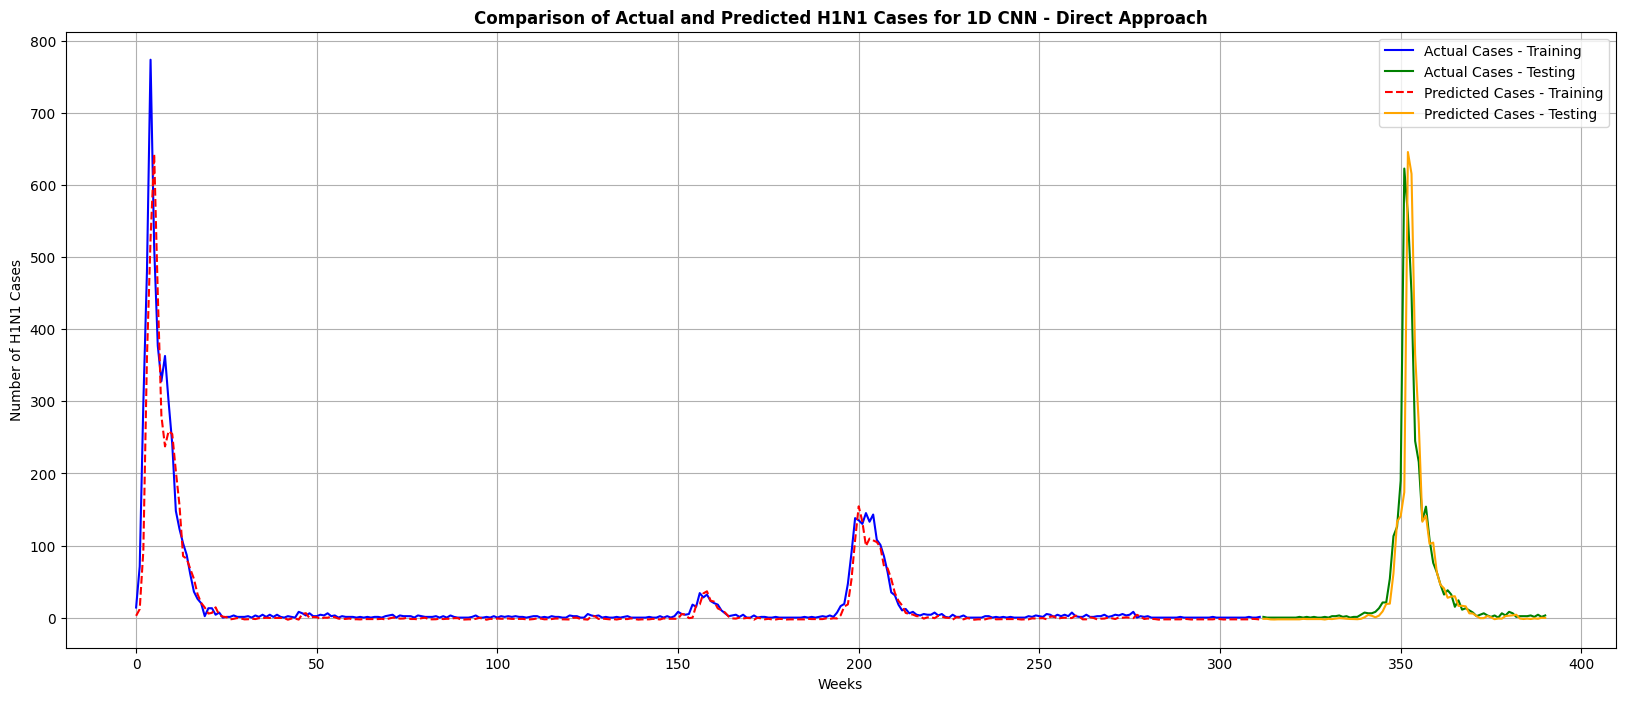

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from google.colab import files

# Upload and read the dataset
uploaded = files.upload()
filename = next(iter(uploaded))
data = pd.read_csv(filename)

# Renaming columns for clarity
data.columns = ['Week', 'Cases']

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data['Cases'] = scaler.fit_transform(data[['Cases']])

# Prepare the sequences
window_size = 3

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Generate sequences using the 'Cases' column
X, y = create_sequences(data['Cases'].values, window_size)

# Reshape for 1D CNN input (Conv1D expects 3D input: [samples, timesteps, features])
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define and compile the 1D CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(window_size, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Predict using both train and test set
train_predictions_normalized = model.predict(X_train)
test_predictions_normalized = model.predict(X_test)

# Inverse transform predictions to original scale
train_predictions = scaler.inverse_transform(train_predictions_normalized)
test_predictions = scaler.inverse_transform(test_predictions_normalized)
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting the results
plt.figure(figsize=(20, 8))
plt.plot(y_train_original, label='Actual Cases - Training', color='blue')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_original, label='Actual Cases - Testing', color='green')
plt.plot(train_predictions, label='Predicted Cases - Training', linestyle='--', color='red')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted Cases - Testing', linestyle='-', color='orange')
plt.title('Comparison of Actual and Predicted H1N1 Cases for 1D CNN - Direct Approach', fontweight='bold', fontsize='12')
plt.xlabel('Weeks')
plt.ylabel('Number of H1N1 Cases')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error

# Assuming 'train_predictions' and 'test_predictions' contain the predicted values from your LSTM,
# and 'y_train_original' and 'y_test_original' contain the actual values.

# Calculate MAE for the training set
mae_train = mean_absolute_error(y_train_original, train_predictions)
# Calculate MAE for the testing set
mae_test = mean_absolute_error(y_test_original, test_predictions)

# Output the calculated MAEs
print("Training Mean Absolute Error:", mae_train)
print("Testing Mean Absolute Error:", mae_test)


Training Mean Absolute Error: 7.577000631735875
Testing Mean Absolute Error: 16.6332718299914
